In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.discrete.discrete_model as sm
from statsmodels.api import add_constant
from sklearn import metrics

In [68]:
df2=pd.read_csv('test.csv')
df1=pd.read_csv('train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [72]:
df1.shape

(891, 12)

In [73]:
df2.shape

(418, 11)

# combining dataset train and test into one

In [74]:
df2['Survived']=2

In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [76]:
frames = [df1,df2]

In [77]:
df = pd.concat(frames,axis=0,sort=True)

In [78]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


# cabin has more than 50 % null values so droping

In [80]:
df_final=df.drop(['Cabin'], axis=1)

In [81]:
df_final.isnull().sum()

Age            263
Embarked         2
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
dtype: int64

# imputation on Embarked feature

In [82]:
df_final.Embarked.fillna(df_final.Embarked.mode()[0],inplace=True)

In [83]:
df_final.isnull().sum()

Age            263
Embarked         0
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
dtype: int64

# imputation on fare feature

In [84]:
df_final.Fare.fillna(df_final.Fare.mean(),inplace=True)
df_final.isnull().sum()

Age            263
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
dtype: int64

# title wise categoring based on name

In [85]:
df_final['Title'] = df_final.Name.apply(lambda Name: Name.split(',')[1].split('.')[0].strip())
df_final.head()


,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr


In [86]:
df_final.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Major             2
Ms                2
the Countess      1
Mme               1
Dona              1
Jonkheer          1
Sir               1
Capt              1
Lady              1
Don               1
Name: Title, dtype: int64

# imputation on age feature

In [87]:
Title_Age = df_final.groupby(df_final['Title']).Age.transform('median')
df_final.Age.fillna(Title_Age,inplace=True)

In [88]:
df_final.isnull().sum()

Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
Title          0
dtype: int64

In [89]:
df_final.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr


In [90]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1309 non-null float64
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


# feature engineearing

# Feature : Age

In [91]:
# AgeState based on Age
df_final['AgeState'] = np.where(df_final['Age'] >= 18, 'Adult','Child')

In [92]:
# AgeState Counts
df_final['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [93]:
# crosstab
pd.crosstab(df_final[df_final.Survived != 2].Survived, df_final[df_final.Survived != 2].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


# familiy size

In [94]:
# Family : Adding Parents with Siblings
df_final['FamilySize'] = df_final.Parch + df_final.SibSp + 1 # 1 for self

In [95]:
pd.crosstab(df_final[df_final.Survived != -2].Survived, df_final[df_final.Survived != -2].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0
2,253,74,57,14,7,3,4,2,4


# Feature : IsMother

In [96]:
# a lady aged more thana 18 who has Parch >0 and is married (not Miss)
df_final['IsMother'] = np.where(((df_final.Sex == 'female') & (df_final.Parch > 0) &
                                 (df_final.Age > 18) & (df_final.Title != 'Miss')), 1, 0)

In [98]:
# Crosstab with IsMother
pd.crosstab(df_final[df_final.Survived != 2].Survived, df_final[df_final.Survived != 2].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


In [99]:
df_final.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Ticket', 'Title', 'AgeState', 'FamilySize',
       'IsMother'],
      dtype='object')

In [100]:
df_final.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeState,FamilySize,IsMother
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr,Adult,2,0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs,Adult,2,0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss,Adult,1,0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs,Adult,2,0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr,Adult,1,0


# Name, ticket all are unique effects the model may leads to overfitting  passenger id will kept for further reference but not using in modelling


In [101]:
df_final.drop('Name',axis=1,inplace=True)
df_final.drop('Ticket',axis=1,inplace=True)

In [103]:
df_final.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,AgeState,FamilySize,IsMother
0,22.0,S,7.2500,0,1,3,male,1,0,Mr,Adult,2,0
1,38.0,C,71.2833,0,2,1,female,1,1,Mrs,Adult,2,0
2,26.0,S,7.9250,0,3,3,female,0,1,Miss,Adult,1,0
3,35.0,S,53.1000,0,4,1,female,1,1,Mrs,Adult,2,0
4,35.0,S,8.0500,0,5,3,male,0,0,Mr,Adult,1,0


In [104]:
df_final.nunique()

Age              99
Embarked          3
Fare            282
Parch             8
PassengerId    1309
Pclass            3
Sex               2
SibSp             7
Survived          3
Title            18
AgeState          2
FamilySize        9
IsMother          2
dtype: int64

In [106]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1309 non-null float64
Embarked       1309 non-null object
Fare           1309 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Title          1309 non-null object
AgeState       1309 non-null object
FamilySize     1309 non-null int64
IsMother       1309 non-null int32
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 138.1+ KB


# converying datatype
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower



In [107]:
df_final.Pclass=df_final.Pclass.astype('object')
df_final.Pclass.dtype

dtype('O')

In [108]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1309 non-null float64
Embarked       1309 non-null object
Fare           1309 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null object
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Title          1309 non-null object
AgeState       1309 non-null object
FamilySize     1309 non-null int64
IsMother       1309 non-null int32
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 138.1+ KB


# dummies variable

In [111]:
df_final = pd.get_dummies(df_final,drop_first=True)
df_final.columns

Index(['Age', 'Fare', 'Parch', 'PassengerId', 'SibSp', 'Survived',
       'FamilySize', 'IsMother', 'Embarked_Q', 'Embarked_S', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'Title_Col', 'Title_Don', 'Title_Dona',
       'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess',
       'AgeState_Child'],
      dtype='object')

# spliting train and test

In [113]:
df1.shape

(891, 12)

In [114]:
df2.shape

(418, 12)

In [120]:
df_final.shape

(1309, 31)

In [117]:
train=df_final[df_final.Survived!=2].head(891)

In [118]:
train.shape# because of feature engineering columns increased

(891, 31)

In [122]:
test=df_final.drop(['Survived'],axis=1).tail(418)

In [123]:
test.shape# because of feature engineering columns increased

(418, 30)

In [124]:
train.nunique()

Age                    89
Fare                  248
Parch                   7
PassengerId           891
SibSp                   7
Survived                2
FamilySize              9
IsMother                2
Embarked_Q              2
Embarked_S              2
Pclass_2                2
Pclass_3                2
Sex_male                2
Title_Col               2
Title_Don               2
Title_Dona              1
Title_Dr                2
Title_Jonkheer          2
Title_Lady              2
Title_Major             2
Title_Master            2
Title_Miss              2
Title_Mlle              2
Title_Mme               2
Title_Mr                2
Title_Mrs               2
Title_Ms                2
Title_Rev               2
Title_Sir               2
Title_the Countess      2
AgeState_Child          2
dtype: int64

In [125]:
test.nunique()

Age                    81
Fare                  170
Parch                   8
PassengerId           418
SibSp                   7
FamilySize              9
IsMother                2
Embarked_Q              2
Embarked_S              2
Pclass_2                2
Pclass_3                2
Sex_male                2
Title_Col               2
Title_Don               1
Title_Dona              2
Title_Dr                2
Title_Jonkheer          1
Title_Lady              1
Title_Major             1
Title_Master            2
Title_Miss              2
Title_Mlle              1
Title_Mme               1
Title_Mr                2
Title_Mrs               2
Title_Ms                2
Title_Rev               2
Title_Sir               1
Title_the Countess      1
AgeState_Child          2
dtype: int64

In [128]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

# modelling

In [146]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import roc_curve, auc

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [148]:
Dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4,random_state=0 )
Rf_model = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=4,random_state=0 )
Nb_model=GaussianNB()
Lr_model=LogisticRegression()
Kn_model=KNeighborsClassifier()

In [155]:
models = []
models.append(('DecisionTree', Dt_model))
models.append(('RandomForest', Rf_model))
models.append(('GaussianNB', Nb_model))
models.append(('K Neighbors', Kn_model))
models.append(('LogisticRegression', Lr_model))


In [156]:
train.columns

Index(['Age', 'Fare', 'Parch', 'PassengerId', 'SibSp', 'Survived',
       'FamilySize', 'IsMother', 'Embarked_Q', 'Embarked_S', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'Title_Col', 'Title_Don', 'Title_Dona',
       'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess',
       'AgeState_Child'],
      dtype='object')

In [157]:
# only droping target variable survived
x=train.loc[:,['Age', 'Fare', 'Parch', 'PassengerId', 'SibSp',
       'FamilySize', 'IsMother', 'Embarked_Q', 'Embarked_S', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'Title_Col', 'Title_Don', 'Title_Dona',
       'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess',
       'AgeState_Child']]

In [158]:
y=train['Survived']

# Standardising independent variable

In [159]:
sx = StandardScaler().fit_transform(x)

C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# kfold validation

DecisionTree: 0.826030 (0.031519)
RandomForest: 0.830537 (0.039663)
GaussianNB: 0.780112 (0.052706)
K Neighbors: 0.610599 (0.091733)


C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LogisticRegression: 0.828290 (0.037917)


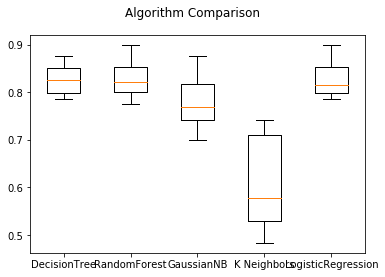

In [161]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=2)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# see the below warning error the logistic values

In [ ]:
#Random forest is the best from above model

# Modelling after hyperparameter tunning

# KNeighborsClassifier hyperparameter tunning

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np
params={'n_neighbors':np.arange(1,30)}
knn=KNeighborsClassifier()
GS=GridSearchCV(knn,params,cv=5)
GS.fit(x,y)
k=GS.best_params_
kn1=k['n_neighbors']
print(' best n_neighbors value: ',k)

 best n_neighbors value:  {'n_neighbors': 28}


C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# DecisionTreeClassifier hyperparameter tunning

In [166]:

import numpy as np
params={'max_depth':np.arange(1,30)}
DT=DecisionTreeClassifier()
GS=GridSearchCV(DT,params,cv=5)
GS.fit(x,y)
k=GS.best_params_
dt1=k['max_depth']
print(' best max_depth value: ',dt1)


 best max_depth value:  3


C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# RandomForest Classifier hyperparameter tunning

In [169]:
params={'max_depth':np.arange(1,30),'n_estimators':np.arange(1,30)}
R=RandomForestClassifier()
GS=GridSearchCV(R,params,cv=5)
GS.fit(x,y)
k=GS.best_params_
k


C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 5, 'n_estimators': 15}

DecisionTree: 0.822672 (0.026956)
RandomForest: 0.831635 (0.035590)
GaussianNB: 0.780112 (0.052706)
K Neighbors: 0.653296 (0.050003)


C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LogisticRegression: 0.828290 (0.037917)


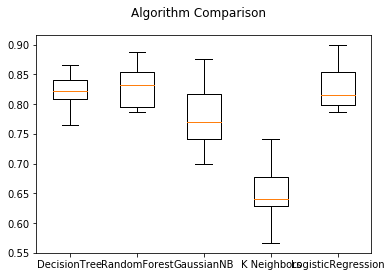

In [170]:
Dt_model = DecisionTreeClassifier(max_depth=3)
Rf_model = RandomForestClassifier( max_depth=5,n_estimators=15)
Nb_model=GaussianNB()
Lr_model=LogisticRegression()
Kn_model=KNeighborsClassifier(28)

models = []
models.append(('DecisionTree', Dt_model))
models.append(('RandomForest', Rf_model))
models.append(('GaussianNB', Nb_model))
models.append(('K Neighbors', Kn_model))
models.append(('LogisticRegression', Lr_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=2)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# see the below warning error the logistic values

In [ ]:
# after tunning before tunning random forest have more accurate
# but after tunning random forest have low variance error So I will pick this

# Best model is random forest so predicting the values using this model for test data

In [175]:
Rf_model.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [176]:
y_prediction=Rf_model.predict(test)


In [183]:
y_prediction.shape

(418,)

In [184]:

y_prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Submission file

In [186]:
mysubmission= pd.DataFrame({'PassengerId':test.PassengerId,'Survived':y_prediction})

In [187]:
mysubmission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [189]:
mysubmission.to_csv('mysubmission.csv',index=0)

# ITERATION 2

In [190]:
# only droping target variable survived
x=train.loc[:,['Age', 'Fare',
       'FamilySize', 'IsMother', 'Embarked_Q', 'Embarked_S', 'Pclass_2',
       'Pclass_3',
       'AgeState_Child']]

In [ ]:
y=train['Survived']

In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np
params={'n_neighbors':np.arange(1,30)}
knn=KNeighborsClassifier()
GS=GridSearchCV(knn,params,cv=5)
GS.fit(x,y)
k=GS.best_params_
kn1=k['n_neighbors']
print(' best n_neighbors value: ',k)

 best n_neighbors value:  {'n_neighbors': 22}


C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [192]:
import numpy as np
params={'max_depth':np.arange(1,30)}
DT=DecisionTreeClassifier()
GS=GridSearchCV(DT,params,cv=5)
GS.fit(x,y)
k=GS.best_params_
dt1=k['max_depth']
print(' best max_depth value: ',dt1)


 best max_depth value:  4


C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [193]:
params={'max_depth':np.arange(1,30),'n_estimators':np.arange(1,30)}
R=RandomForestClassifier()
GS=GridSearchCV(R,params,cv=5)
GS.fit(x,y)
k=GS.best_params_
k


C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 6, 'n_estimators': 27}

DecisionTree: 0.718340 (0.052519)
RandomForest: 0.747541 (0.040068)
GaussianNB: 0.707129 (0.045451)
K Neighbors: 0.716180 (0.051205)


C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LogisticRegression: 0.729588 (0.051129)


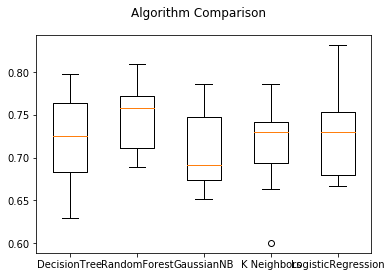

In [195]:
Dt_model = DecisionTreeClassifier(max_depth=4)
Rf_model = RandomForestClassifier( max_depth=6,n_estimators=27)
Nb_model=GaussianNB()
Lr_model=LogisticRegression()
Kn_model=KNeighborsClassifier(22)

models = []
models.append(('DecisionTree', Dt_model))
models.append(('RandomForest', Rf_model))
models.append(('GaussianNB', Nb_model))
models.append(('K Neighbors', Kn_model))
models.append(('LogisticRegression', Lr_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=2)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# see the below warning error the logistic values

In [ ]:

R# there is no increade model so best is above iteration
